# Introduction

This notebook is a demo on how to setup a basic Workflow to Work with Jupyter Notebooks


## Setup project

For project setup we will use [poetry](https://python-poetry.org/docs/) as dependency management tool

In [14]:
import sys
import os

sys.path.append('../')
os.chdir("../")

In [87]:
!wget -O - https://install.python-poetry.org | python3 -

--2022-11-25 18:43:53--  https://install.python-poetry.org/
Resolving install.python-poetry.org (install.python-poetry.org)... 76.76.21.241, 76.76.21.9
Connecting to install.python-poetry.org (install.python-poetry.org)|76.76.21.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28457 (28K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]  27.79K  --.-KB/s    in 0.004s  

2022-11-25 18:43:53 (7.45 MB/s) - written to stdout [28457/28457]

Retrieving Poetry metadata

# Welcome to Poetry!

This will download and install the latest version of Poetry,
a dependency and package manager for Python.

It will add the `poetry` command to Poetry's bin directory, located at:

/home/jovyan/.local/bin

You can uninstall at any time by executing this script with the --uninstall option,
and these changes will be reverted.

Installing Poetry (1.2.2)
Installing Poetry (1.2.2): Creating environment
Installing Poetry (1.2.2): Installing Poetry
Inst

In [15]:
%alias poetry /home/jovyan/.local/bin/poetry 

In [16]:
poetry --version

Poetry (version 1.2.2)


In [41]:
import sys

os.environ['PYTHON_BIN'] = sys.executable

In [49]:
poetry env info


Virtualenv
Python:         3.10.6
Implementation: CPython
Path:           /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10
Executable:     /home/jovyan/.cache/pypoetry/virtualenvs/cd4ml-8EXZSVYp-py3.10/bin/python
Valid:          True

System
Platform:   linux
OS:         posix
Python:     3.10.6
Path:       /opt/conda
Executable: /opt/conda/bin/python3.10


In [50]:
poetry env use system

### Initialize project 

This will generate the structure necessary to run data science jobs

In [28]:
# Configure here package information that will be put in Poetry configuration
import sys
import os

os.environ['NAME'] = "cd4ml"
os.environ['DESCRIPTION'] = "Data science experiment tutorial"
os.environ['PYTHON'] = f"{sys.version_info[0]}.{sys.version_info[1]}.{sys.version_info[2]}"
os.environ['AUTHOR'] = "Eduardo Santos <eduardo.santos@thoughtworks.com>"

In [29]:
poetry init --name="$NAME" --description="$DESCRIPTION" --python="$PYTHON" --author="$AUTHOR" --no-interaction

You can see generated file clicking here: [pyproject.toml](../pyproject.toml)

### Generate project structure

We are going to use as reference the [data science cookiecutter template](https://drivendata.github.io/cookiecutter-data-science/), which folllows this standard:

```
├── LICENSE
├── Makefile           <- Makefile with commands like `make data` or `make train`
├── README.md          <- The top-level README for developers using this project.
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default Sphinx project; see sphinx-doc.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
│                         the creator's initials, and a short `-` delimited description, e.g.
│                         `1.0-jqp-initial-data-exploration`.
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures        <- Generated graphics and figures to be used in reporting
│
├── pyproject.toml     <- Poetry configuration file
│
├── setup.py           <- makes project pip installable (pip install -e .) so src can be imported
├── src                <- Source code for use in this project.
│   ├── __init__.py    <- Makes src a Python module
│   │
│   ├── data           <- Scripts to download or generate data
│   │   └── make_dataset.py
│   │
│   ├── features       <- Scripts to turn raw data into features for modeling
│   │   └── build_features.py
│   │
│   ├── models         <- Scripts to train models and then use trained models to make
│   │   │                 predictions
│   │   ├── predict_model.py
│   │   └── train_model.py
│   │
│   └── visualization  <- Scripts to create exploratory and results oriented visualizations
│       └── visualize.py
│
└── tox.ini            <- tox file with settings for running tox; see tox.readthedocs.io
```

For now we just need the directories that will hold the data code

In [82]:
!mkdir -p src/data
!touch src/__init__.py

## Data extraction

For this example we will download some news feed data to use as a dataset. As this is an introductory example just a few news will be used

### Download data

The goal is to create the case as a multistep feature extraction. First step is to create a function to download data from a service provider

In [51]:
poetry add feedparser pandas metaflow

The following packages are already present in the pyproject.toml and will be skipped:

  • feedparser
  • pandas
  • metaflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [52]:
poetry install

Installing dependencies from lock file

Package operations: 0 installs, 4 updates, 0 removals

  • Updating python-dateutil (2.8.2 /home/jovyan/.cache/pypoetry/artifacts/39/9b/3b/576da7c854551d780528d75132c98882925e44de0aecf8a31a4bea379c/python_dateutil-2.8.2-py2.py3-none-any.whl -> 2.8.2): Pending...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b668a0706728efd6a7f0a40e7101d2e962853f26d0c062aff/urllib3-1.26.13-py2.py3-none-any.whl -> 1.26.13): Pending...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b668a0706728efd6a7f0a40e7101d2e962853f26d0c062aff/urllib3-1.26.13-py2.py3-none-any.whl -> 1.26.13): Pending...
  • Updating python-dateutil (2.8.2 /home/jovyan/.cache/pypoetry/artifacts/39/9b/3b/576da7c854551d780528d75132c98882925e44de0aecf8a31a4bea379c/python_dateutil-2.8.2-py2.py3-none-any.whl -> 2.8.2): Installing...
  • Updating urllib3 (1.26.13 /home/jovyan/.cache/pypoetry/artifacts/0c/77/f9/b449e07d3b66

In [53]:
import feedparser
import pandas as pd

url = 'https://g1.globo.com/rss/g1/'

blog_feed = feedparser.parse(url)

posts = blog_feed.entries  
post_list = []

for post in posts:
    post_dict = dict()

    post_dict["TITLE"] = post.title
    post_dict["CONTENT"] = post.summary
    post_dict["LINK"] = post.link
    post_dict["TIME_PUBLISHED"] = post.published
    # post_dict["TAGS"] = [tag.term for tag in post.tags]

    post_list.append(post_dict)
df_post = pd.DataFrame(post_list)
df_post

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Governo de Alagoas antecipa feriado do Dia do ...,"<img src=""https://s2.glbimg.com/k-pO2RIZrBecUT...",https://g1.globo.com/al/alagoas/noticia/2022/1...,"Fri, 25 Nov 2022 19:34:30 -0000"
1,JAM1 - edição de 25 de novembro de 2022,"<img src=""https://s2.glbimg.com/5hJ8YmOvsA8SoR...",https://g1.globo.com/am/amazonas/playlist/jam1...,"Fri, 25 Nov 2022 19:34:10 -0000"
2,Ruas do Centro de Manaus serão interditadas ao...,"<img src=""https://s2.glbimg.com/2Cpxkrm0sGS7Ft...",https://g1.globo.com/am/amazonas/noticia/2022/...,"Fri, 25 Nov 2022 19:34:04 -0000"
3,"Ex-prefeito de Jequié, Walter Santos Sampaio m...",Prefeitura da cidade decretou luto por três di...,https://g1.globo.com/ba/bahia/noticia/2022/11/...,"Fri, 25 Nov 2022 19:30:46 -0000"
4,Limeira realiza novo plantão de multivacinação...,"<img src=""https://s2.glbimg.com/56pxJ-Y9pMOQCT...",https://g1.globo.com/sp/piracicaba-regiao/noti...,"Fri, 25 Nov 2022 19:30:44 -0000"
5,Justiça nega pedido de liberdade de empresário...,"<img src=""https://s2.glbimg.com/c2EJCaebasuijv...",https://g1.globo.com/ce/ceara/noticia/2022/11/...,"Fri, 25 Nov 2022 19:30:42 -0000"
6,Câmera de segurança registra assalto a sorvete...,O crime aconteceu durante a noite de quinta-fe...,https://g1.globo.com/sp/itapetininga-regiao/no...,"Fri, 25 Nov 2022 19:29:50 -0000"
7,Carro fica completamente destruído depois de b...,"<img src=""https://s2.glbimg.com/H5N2juqeDpqIce...",https://g1.globo.com/go/goias/transito/noticia...,"Fri, 25 Nov 2022 19:28:57 -0000"
8,Justiça federal do AM determina que União adot...,"<img src=""https://s2.glbimg.com/vS9ETvvL7sCrNp...",https://g1.globo.com/politica/noticia/2022/11/...,"Fri, 25 Nov 2022 19:28:52 -0000"
9,Recifense Micheliny Verunschk vence Prêmio Jab...,"<img src=""https://s2.glbimg.com/MbmUtzmayGNJp1...",https://g1.globo.com/pe/pernambuco/noticia/202...,"Fri, 25 Nov 2022 19:26:42 -0000"


### Create your first metaflow workflow

Now that we downloaded the data we can use to create new features. Let's create a workflow to download feeds from differente providers. No we are going to user [Neflix Open Source metaflow Workflow package](https://metaflow.org/) to make the job easier.

In [54]:
poetry add metaflow

The following packages are already present in the pyproject.toml and will be skipped:

  • metaflow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [56]:
%%writefile src/data/feeds_flow.py

import feedparser
import pandas as pd

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.end)
              
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()

Writing src/data/feeds_flow.py


In [57]:
!python src/data/feeds_flow.py show

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Creating local datastore in current directory (/home/jovyan/.metaflow)



Step start
    ?
    => fetch_feed_data

Step fetch_feed_data
    ?
    => feeds_aggregate

Step feeds_aggregate
    ?
    => end

Step end
    ?



In [58]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-25 19:46:55.608 Workflow starting (run-id 1669405615532166):
2022-11-25 19:46:55.636 [1669405615532166/start/1 (pid 11613)] Task is starting.
2022-11-25 19:46:56.291 [1669405615532166/start/1 (pid 11613)] Foreach yields 3 child steps.
2022-11-25 19:46:56.291 [1669405615532166/start/1 (pid 11613)] Task finished successfully.
2022-11-25 19:46:56.328 [1669405615532166/fetch_feed_data/2 (pid 11617)] Task is starting.
2022-11-25 19:46:56.347 [1669405615532166/fetch_feed_data/3 (pid 11618)] Task is starting.
2022-11-25 19:46:56.370 [1669405615532166/fetch_feed_data/4 (pid 11619)] Task is starting.
2022-11-25 19:46:57.059 [1669405615532166/fetch_feed_data/2 (pid 11617)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/rss091.xml
2022-11-25 19:46:57.210 [1669405615532166/fetch_feed_data/4 (pid 11619)] Downloading from url https://g

### Investigating results

Metaflow package has a builtin experiment versioning system. Let's analyze the worflow and its executions so far

In [59]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669405615532166')]

It is possible to see all valid runs, that by now are running locally. Let's analyze the results from last run.

In [60]:
from metaflow import Run
r = fl.latest_run

Acessing the `data` attribute for the run it is possible to see the final result consolidated by the run. Let's analyze it and compare to the manually generated data created before

In [61]:
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Maldição da Copa estraga até os melhores bares,"Na Copa do Mundo, como em qualquer outra ocasi...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:32:00 -0300
1,Fifa divulga dados de público maiores que capa...,"Deu no álbum da <a href=""https://www1.folha.uo...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:28:00 -0300
2,"Economia libera R$ 37,4 milhões para PF retoma...",O Ministério da Economia editou uma portaria p...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:23:00 -0300
3,Ingleses voltam a protestar contra o racismo a...,Da mesma forma que fizeram na estreia da <a hr...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:15:00 -0300
4,Arqueólogos solucionam mistério e encontram mu...,"Uma equipe de <a href=""https://www1.folha.uol....",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:11:00 -0300
...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000"
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000"
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000"
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000"


## Feature generation

Now that we have been able to add news from other sources, let's run a simple feature generation process. As the goal is to tokenize the results, let's add a new step to the workflow creating a tokenized version of the content. The final goal is to apply an LDA transformation.

In [62]:
poetry add nltk

Using version ^3.7 for nltk

Updating dependencies
Resolving dependencies... (7.5s)s://files.pythonhosted.org/packages/91/d4/3b4c8e5a30604df4c7518c562d4bf0502f2fa29221459226e140cf846512/joblib-1.2.0-py3-none-any.whl (7.2s)

Writing lock file

Package operations: 5 installs, 0 updates, 0 removals

  • Installing click (8.1.3): Pending...
  • Installing joblib (1.2.0): Pending...
  • Installing regex (2022.10.31): Pending...
  • Installing tqdm (4.64.1): Pending...
  • Installing joblib (1.2.0): Pending...
  • Installing regex (2022.10.31): Pending...
  • Installing tqdm (4.64.1): Pending...
  • Installing click (8.1.3): Downloading... 0%
  • Installing joblib (1.2.0): Pending...
  • Installing regex (2022.10.31): Pending...
  • Installing tqdm (4.64.1): Pending...
  • Installing regex (2022.10.31): Pending...
  • Installing tqdm (4.64.1): Pending...
  • Installing joblib (1.2.0): Downloading... 0%
  • Installing regex (2022.10.31): Pending...
  • Installing tqdm (4.64.1): Pending...
  •

In [63]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jovyan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_

True

### Tokenization

Our new workflow will have a preprocess step added to tokenize news texts. Let's bring back the old workflow and add new code to it. You can get the file we just generated by executing the load command in an empty cell:

```
%load src/data/feeds_flow.py
```

Then we will write the results back to the cell


```
%%writefile src/data/feeds_flow.py
```

In [73]:
%%writefile src/data/feeds_flow.py
# %load src/data/feeds_flow.py

import feedparser
import pandas as pd
import re

from nltk import word_tokenize
from nltk.corpus import stopwords

import string
import pendulum

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]

            post_list.append(post_dict)

        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.preprocess_pandas)
              
    @step
    def preprocess_pandas(self):
        stop = set(stopwords.words('portuguese') + list(string.punctuation))
        stop.update(['http', 'pro', 'https', 't.', 'co'])

        def preprocess(words):
            # Remove HTML marks
            words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
            tokens = word_tokenize(words)
            tokens = [word for word in tokens if word not in stop]
            tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
            return tokens
    
        self.results['token_set'] = self.results.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
        print("Tokenization finished!")
        self.next(self.end)
    
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()

Overwriting src/data/feeds_flow.py


In [74]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-25 19:54:18.553 Workflow starting (run-id 1669406058484905):
2022-11-25 19:54:18.577 [1669406058484905/start/1 (pid 11988)] Task is starting.
2022-11-25 19:54:19.284 [1669406058484905/start/1 (pid 11988)] Foreach yields 3 child steps.
2022-11-25 19:54:19.284 [1669406058484905/start/1 (pid 11988)] Task finished successfully.
2022-11-25 19:54:19.320 [1669406058484905/fetch_feed_data/2 (pid 11999)] Task is starting.
2022-11-25 19:54:19.336 [1669406058484905/fetch_feed_data/3 (pid 12000)] Task is starting.
2022-11-25 19:54:19.350 [1669406058484905/fetch_feed_data/4 (pid 12001)] Task is starting.
2022-11-25 19:54:20.298 [1669406058484905/fetch_feed_data/3 (pid 12000)] Downloading from url https://g1.globo.com/rss/g1/
2022-11-25 19:54:20.304 [1669406058484905/fetch_feed_data/2 (pid 11999)] Downloading from url https://feeds.folha.uol.com.br/emci

Let's see the resulting data after adding one step.

In [75]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669406058484905'),
 Run('FeedsFlow/1669405882277582'),
 Run('FeedsFlow/1669405615532166')]

There's a new run with the new features. One of the most important features in metaflow is the experiment versioning. Loading the new execution it is possible to see the newly generated results.

In [76]:
from metaflow import Run
r = fl.latest_run
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED,token_set
0,Cardeal investigado por fraude gravou ligação ...,"Um <a href=""https://www1.folha.uol.com.br/mund...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:48:00 -0300,"[cardeal, italiano, investigado, crimes, finan..."
1,Maldição da Copa estraga até os melhores bares,"Na Copa do Mundo, como em qualquer outra ocasi...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:32:00 -0300,"[copa, mundo, qualquer, outra, ocasião, boteco..."
2,Fifa divulga dados de público maiores que capa...,"Deu no álbum da <a href=""https://www1.folha.uo...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:28:00 -0300,"[deu, álbum, copa, estádios, dedicados, compet..."
3,"Economia libera R$ 37,4 milhões para PF retoma...",O Ministério da Economia editou uma portaria p...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:23:00 -0300,"[ministério, economia, editou, portaria, liber..."
4,Ingleses voltam a protestar contra o racismo a...,Da mesma forma que fizeram na estreia da <a hr...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:15:00 -0300,"[mesma, forma, fizeram, estreia, copa, mundo, ..."
...,...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000","[órgão, passará, atender, rua, perdizes, 280, ..."
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000","[agressão, aconteceu, madrugada, desta, segund..."
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000","[jovem, morta, agosto, 2016., seis, pessoas, p..."
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000","[segundo, delegado, necessárias, três, semanas..."


### Date conversion

As the feeds have different formats for date, let's try to generate an unified date field. Again we load and generate a new file for the flow

In [71]:
poetry add pendulum

Using version ^2.1.2 for pendulum

Updating dependencies
Resolving dependencies... (0.8s)s://files.pythonhosted.org/packages/e0/4f/4474bda990ee740a020cbc3eb271925ef7daa7c8444240d34ff62c8442a3/pytzdata-2020.1-py2.py3-none-any.whl (0.4s)

Writing lock file

Package operations: 2 installs, 1 update, 0 removals

  • Updating joblib (1.2.0 /home/jovyan/.cache/pypoetry/artifacts/20/f2/f7/02e2a5cb33bf791b5d0944b1d1e10a01f82c8226a65e5f1244dd62ff09/joblib-1.2.0-py3-none-any.whl -> 1.2.0): Pending...
  • Installing pytzdata (2020.1): Pending...
  • Installing pytzdata (2020.1): Pending...
  • Updating joblib (1.2.0 /home/jovyan/.cache/pypoetry/artifacts/20/f2/f7/02e2a5cb33bf791b5d0944b1d1e10a01f82c8226a65e5f1244dd62ff09/joblib-1.2.0-py3-none-any.whl -> 1.2.0): Installing...
  • Installing pytzdata (2020.1): Pending...
  • Installing pytzdata (2020.1): Downloading... 0%
  • Installing pytzdata (2020.1): Downloading... 10%
  • Installing pytzdata (2020.1): Downloading... 30%
  • Installing pytzdat

In [77]:
%%writefile src/data/feeds_flow.py
# %load src/data/feeds_flow.py

import feedparser
import pandas as pd
import re

from nltk import word_tokenize
from nltk.corpus import stopwords

import string
import pendulum

from metaflow import FlowSpec, step

class FeedsFlow(FlowSpec):

    @step
    def start(self):
        self.feeds_url = [
            'https://feeds.folha.uol.com.br/emcimadahora/rss091.xml',
            'https://g1.globo.com/rss/g1/',
            'https://g1.globo.com/rss/g1/brasil'
        ]
        self.next(self.fetch_feed_data, foreach='feeds_url')

    @step
    def fetch_feed_data(self):
        
        print(f"Downloading from url {self.input}")
        blog_feed = feedparser.parse(self.input)

        posts = blog_feed.entries  
        post_list = []

        for post in posts:
            post_dict = dict()

            post_dict["TITLE"] = post.title
            post_dict["CONTENT"] = post.summary
            post_dict["LINK"] = post.link
            post_dict["TIME_PUBLISHED"] = post.published
            # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
            # First date conversion try:
            dt = None
            try:
                dt = pendulum.from_format(post.published, 'DD MMM YYYY HH:mm:ss ZZ') 
            except ValueError as e:
                dt = pendulum.from_format(post.published, 'ddd, DD MMM YYYY HH:mm:ss ZZ')
            except ValueError as e:
                print(f"Formating error!\n{e}")
            post_dict['PUBLISHED'] = dt

            post_list.append(post_dict)
        self.posts = pd.DataFrame(post_list)        
        self.next(self.feeds_aggregate)

    @step
    def feeds_aggregate(self, inputs):
        self.results = pd.concat([input.posts for input in inputs])
        self.next(self.preprocess_pandas)
              
    @step
    def preprocess_pandas(self):
        stop = set(stopwords.words('portuguese') + list(string.punctuation))
        stop.update(['http', 'pro', 'https', 't.', 'co'])

        def preprocess(words):
            # Remove HTML marks
            words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
            tokens = word_tokenize(words)
            tokens = [word for word in tokens if word not in stop]
            tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
            return tokens
    
        self.results['token_set'] = self.results.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
        print("Tokenization finished!")
        self.next(self.end)
    
    @step
    def end(self):
        print('Workflow finished!')
        
if __name__ == '__main__':
    FeedsFlow()


Overwriting src/data/feeds_flow.py


In [78]:
!python src/data/feeds_flow.py run

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2022-11-25 19:55:03.939 Workflow starting (run-id 1669406103878472):
2022-11-25 19:55:03.964 [1669406103878472/start/1 (pid 12042)] Task is starting.
2022-11-25 19:55:04.682 [1669406103878472/start/1 (pid 12042)] Foreach yields 3 child steps.
2022-11-25 19:55:04.682 [1669406103878472/start/1 (pid 12042)] Task finished successfully.
2022-11-25 19:55:04.716 [1669406103878472/fetch_feed_data/2 (pid 12053)] Task is starting.
2022-11-25 19:55:04.736 [1669406103878472/fetch_feed_data/3 (pid 12054)] Task is starting.
2022-11-25 19:55:04.775 [1669406103878472/fetch_feed_data/4 (pid 12055)] Task is starting.
2022-11-25 19:55:05.577 [1669406103878472/fetch_feed_data/2 (pid 12053)] Downloading from url https://feeds.folha.uol.com.br/emcimadahora/rss091.xml
2022-11-25 19:55:05.584 [1669406103878472/fetch_feed_data/3 (pid 12054)] Downloading from url https://g

Let's see again the output data

In [79]:
from metaflow import Flow
fl = Flow('FeedsFlow')
runs_list = list(fl)
runs_list

[Run('FeedsFlow/1669406103878472'),
 Run('FeedsFlow/1669406058484905'),
 Run('FeedsFlow/1669405882277582'),
 Run('FeedsFlow/1669405615532166')]

In [80]:
from metaflow import Run
r = fl.latest_run
df_r = r.data.results
df_r

,TITLE,CONTENT,LINK,TIME_PUBLISHED,PUBLISHED,token_set
0,Cardeal investigado por fraude gravou ligação ...,"Um <a href=""https://www1.folha.uol.com.br/mund...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:48:00 -0300,2022-11-25 16:48:00-03:00,"[cardeal, italiano, investigado, crimes, finan..."
1,Maldição da Copa estraga até os melhores bares,"Na Copa do Mundo, como em qualquer outra ocasi...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:32:00 -0300,2022-11-25 16:32:00-03:00,"[copa, mundo, qualquer, outra, ocasião, boteco..."
2,Fifa divulga dados de público maiores que capa...,"Deu no álbum da <a href=""https://www1.folha.uo...",https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:28:00 -0300,2022-11-25 16:28:00-03:00,"[deu, álbum, copa, estádios, dedicados, compet..."
3,"Economia libera R$ 37,4 milhões para PF retoma...",O Ministério da Economia editou uma portaria p...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:23:00 -0300,2022-11-25 16:23:00-03:00,"[ministério, economia, editou, portaria, liber..."
4,Ingleses voltam a protestar contra o racismo a...,Da mesma forma que fizeram na estreia da <a hr...,https://redir.folha.com.br/redir/online/emcima...,25 Nov 2022 16:15:00 -0300,2022-11-25 16:15:00-03:00,"[mesma, forma, fizeram, estreia, copa, mundo, ..."
...,...,...,...,...,...,...
35,Procon suspende atendimentos nesta terça e qua...,"<img src=""https://s2.glbimg.com/3pgG9TP2ryZosq...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:33:44 -0000",2018-07-23 15:33:44+00:00,"[órgão, passará, atender, rua, perdizes, 280, ..."
36,Homem persegue esposa com facão após vítima vo...,"<img src=""https://s2.glbimg.com/3bNJ3sUSiloSnI...",https://g1.globo.com/ro/rondonia/noticia/2018/...,"Mon, 23 Jul 2018 15:30:17 -0000",2018-07-23 15:30:17+00:00,"[agressão, aconteceu, madrugada, desta, segund..."
37,Quase dois anos após matar grávida e roubar be...,"<img src=""https://s2.glbimg.com/scebsn6NM18wLX...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Mon, 23 Jul 2018 15:21:41 -0000",2018-07-23 15:21:41+00:00,"[jovem, morta, agosto, 2016., seis, pessoas, p..."
38,Homem é preso pela Polícia Civil por suspeita ...,"Segundo delegado, foram necessárias três seman...",https://g1.globo.com/mg/zona-da-mata/noticia/2...,"Mon, 23 Jul 2018 15:06:03 -0000",2018-07-23 15:06:03+00:00,"[segundo, delegado, necessárias, três, semanas..."


### Final basic flow

Let's visualize it and see hot the basic flow stands

In [84]:
!mamba install -y graphviz


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['graphviz']

[+] 0.0s
[+] 0.1s
conda-forge/linux-aarch64 ━━━━━━━━━━━━━╸━━━━   0.0 B /  ??.?MB @  ??

In [88]:
poetry add --group dev graphviz

The following packages are already present in the pyproject.toml and will be skipped:

  • graphviz

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [93]:
!mkdir -p data
!python src/data/feeds_flow.py output-dot | dot -o data/feeds.dot

Metaflow 2.7.14 executing FeedsFlow for user:jovyan
Visualizing the flow as a GraphViz graph
    Try piping the output to 'dot -Tpng -o graph.png' to produce an actual image.


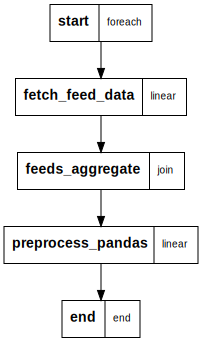

In [94]:
import graphviz

graphviz.Source.from_file('data/feeds.dot')

## Writing results

Finally we will use the generated Dataframe to save parquet generated files that can be used on next steps